# Linear Regression 

## What is Linear Regression?
A statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables. 
- One variable, denoted $x$, is regarded as the **predictor**, **explanatory**, or **independent variable**.
- The other variable, $y$ denoted , is regarded as the **response**, **outcome**, or **dependent variable**.


In short, algorithms that learn how output($y$) depends on input($x$)
$$y = f(x)$$
The simplest form of $f$; 
$y = mx + c$


## Linear Regression Equation
The simplest form of a simple linear regression equation with one dependent and one independent variable is represented by: 
$$y = mx +c$$

Where, 
- $y$ = dependent variable 
- $x$ = independent variable 
- $m$ = slope of the line 
- $c$ = coefficient of the line 

$$ m = \frac{y_2 - y_1}{x_2 - x_1}$$

Calculating slope(m) of the line 

$$
m = r \frac{S_y}{S_x}
$$

Where, 
- m = slope of the line 
- r = pearson's r correlation
- $S_y$ = standard deviation of y 
- $S_x$ = standard deviation of the x

Calculating y-intercept coefficient(c) of the line
$$
c = \overline y - m \overline x
$$

Where, 
- c = intercept(c) or coefficient of the line 
- m = slope of the line 
- $\overline y$ mean of y 
- $\overline x$ mean of x

## Multiple Linear Regression
$$
y = m_1x_1 + m_2y_2 + m_3y_3 + \cdots + m_nx_n + c
$$

- $x_1, x_2, x_3$ = independent variables 
- $y$ = dependent variable 
- $m_1, m_2, m_3$ = slopes 
- $c$ = coefficient

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [24]:
x_and_y = [(0, 1), (1, 3), (2, 2), (3, 5), (4, 7), (5, 8), (6, 8), (7, 9), (8, 10), (9,12)]
x_and_y

[(0, 1),
 (1, 3),
 (2, 2),
 (3, 5),
 (4, 7),
 (5, 8),
 (6, 8),
 (7, 9),
 (8, 10),
 (9, 12)]

In [25]:
data = pd.DataFrame(x_and_y, columns=['X', 'Y_true'])
data

,X,Y_true
0,0,1
1,1,3
2,2,2
3,3,5
4,4,7
5,5,8
6,6,8
7,7,9
8,8,10
9,9,12


## Calculating Slope(m) of the Line 

$$
m = r \frac{S_y}{S_x}
$$

Where, 
- m = slope of the line 
- r = pearson's r correlation
- $S_y$ = standard deviation of y 
- $S_x$ = standard deviation of the x

In [27]:
# calculate pearson's r correlation
data['X'].corr(data['Y_true'])

0.9759805523748861

In [28]:
# calculate the standard deviation of `x`
data['X'].std() 

3.0276503540974917

In [29]:
# calculate the standard deviation of `y`
data['Y_true'].std() 

3.6285901761795403

In [30]:
m = 0.97 * (3.6/3.02)
print(m)

1.1562913907284769


## Calculating y-intercept coefficient(c) of the line
$$
c = \overline y - m \overline x
$$

Where, 
- c = intercept(c) or coefficient of the line 
- m = slope of the line 
- $\overline y$ mean of y 
- $\overline x$ mean of x 

In [31]:
# calculate the mean of `y`
data['Y_true'].mean() 

6.5

In [32]:
# calculate the mean of `x`
data['X'].mean() 

4.5

In [33]:
c = 6.5 - m * 4.5
print(round(c, 2))

1.3


In [34]:
data

,X,Y_true
0,0,1
1,1,3
2,2,2
3,3,5
4,4,7
5,5,8
6,6,8
7,7,9
8,8,10
9,9,12


In [35]:
y_pred = m * 1 + c 
print(y_pred)

2.452980132450331


In [36]:
data['Y_pred'] = m * data['X'] + c 
data

,X,Y_true,Y_pred
0,0,1,1.296689
1,1,3,2.452980
2,2,2,3.609272
3,3,5,4.765563
4,4,7,5.921854
5,5,8,7.078146
6,6,8,8.234437
7,7,9,9.390728
8,8,10,10.547020
9,9,12,11.703311


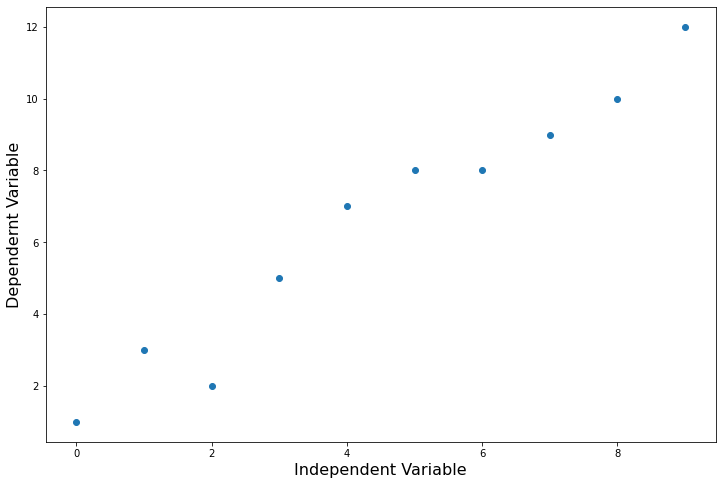

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(data['X'], data['Y_true'])
plt.xlabel("Independent Variable", fontsize=16)
plt.ylabel("Dependernt Variable", fontsize=16)
plt.show() 

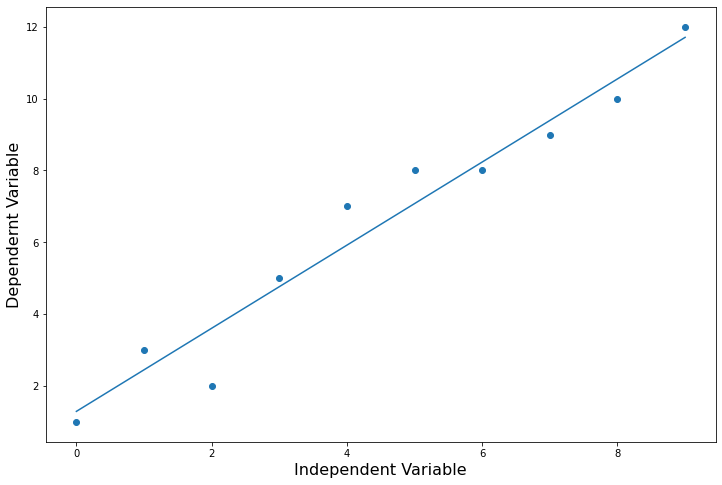

In [39]:
plt.figure(figsize=(12,8))
# predicted value 
plt.scatter(data['X'], data['Y_true'])
# scatter plot of X and Y 
plt.plot(data['X'], data['Y_pred'])
plt.xlabel("Independent Variable", fontsize=16)
plt.ylabel("Dependernt Variable", fontsize=16)
plt.show() 

## Metrics for Evaluating Regression Model 

### Calculate Errors 

In [40]:
data['errors'] = data['Y_true'] - data['Y_pred']
data

,X,Y_true,Y_pred,errors
0,0,1,1.296689,-0.296689
1,1,3,2.452980,0.547020
2,2,2,3.609272,-1.609272
3,3,5,4.765563,0.234437
4,4,7,5.921854,1.078146
5,5,8,7.078146,0.921854
6,6,8,8.234437,-0.234437
7,7,9,9.390728,-0.390728
8,8,10,10.547020,-0.547020
9,9,12,11.703311,0.296689


In [41]:
# define true and predicted response values
true = data['Y_true']
pred = data['Y_pred']

### $R^2$ Score 
In statistics, the coefficient of determination, denoted $R^2$ or $r^2$ and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable.
$$
R^2 = \frac{1 - SSR}{SST}
$$

Where, 
- $R^2$ = coefficient of determination
- SSR = sum of square of residuals(errors) 
- SST = total sum of squares

$$
SST = \frac{\overline y_t}{\sigma}
$$

- $y_t$ = actual value 
- $\sigma$ = standard deviations 

### Key Points 
- The most common and popular metric for evaluating regression
- Between 0 and 100%
- Unfortunately, always increases by adding new x variables
- Can lead to overfitting
- Adjusted R2 preferred for evaluating multiple regression
 
## Adjusted-$R^2$

- Adjusted-$R^2$ = $R^2$ x (Penalty for adding irrelevant variables)
- Increases if irrelevant* variables are deleted
- (*irrelevant variables = any group whose F-ratio < 1)


#### Interpretation
- $r^2$ > 0.9; Good model 
- $r^2$ = 1.0; Perfect model, it means zero error(SSR = 0) 
- $r^2$ > 0.5; Bad model; mean model(SSR = SST)
- $r^2$ < 0; SSR > SST  

In [42]:
# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.r2_score(true, pred)) 

0.9524129243720711


### Absolute Error
$$\lvert y_t - y_p \rvert$$

Where, 
- $y_t$ = true value of y
- $y_p$ = predicted value of y 

In [44]:
np.abs(data['errors']).mean() 

0.6156291390728477

### Mean Absolute Error(MAE)
**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_t- {y}_p|$$

In [46]:
# calculate MAE by hand
print(np.abs(data['errors']).mean())
# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

0.6156291390728477
0.6156291390728477


### Mean Squared Error
**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_t-{y}_p)^2$$

In [47]:
data

,X,Y_true,Y_pred,errors
0,0,1,1.296689,-0.296689
1,1,3,2.452980,0.547020
2,2,2,3.609272,-1.609272
3,3,5,4.765563,0.234437
4,4,7,5.921854,1.078146
5,5,8,7.078146,0.921854
6,6,8,8.234437,-0.234437
7,7,9,9.390728,-0.390728
8,8,10,10.547020,-0.547020
9,9,12,11.703311,0.296689


In [48]:
data['abseror'] = np.abs(data['errors'])
data

,X,Y_true,Y_pred,errors,abseror
0,0,1,1.296689,-0.296689,0.296689
1,1,3,2.452980,0.547020,0.547020
2,2,2,3.609272,-1.609272,1.609272
3,3,5,4.765563,0.234437,0.234437
4,4,7,5.921854,1.078146,1.078146
5,5,8,7.078146,0.921854,0.921854
6,6,8,8.234437,-0.234437,0.234437
7,7,9,9.390728,-0.390728,0.390728
8,8,10,10.547020,-0.547020,0.547020
9,9,12,11.703311,0.296689,0.296689


In [51]:
data['sqerror'] = data['errors'] ** 2
data

,X,Y_true,Y_pred,errors,abseror,sqerror
0,0,1,1.296689,-0.296689,0.296689,0.088024
1,1,3,2.452980,0.547020,0.547020,0.299231
2,2,2,3.609272,-1.609272,1.609272,2.589755
3,3,5,4.765563,0.234437,0.234437,0.054961
4,4,7,5.921854,1.078146,1.078146,1.162398
5,5,8,7.078146,0.921854,0.921854,0.849815
6,6,8,8.234437,-0.234437,0.234437,0.054961
7,7,9,9.390728,-0.390728,0.390728,0.152669
8,8,10,10.547020,-0.547020,0.547020,0.299231
9,9,12,11.703311,0.296689,0.296689,0.088024


In [52]:
data['sqerror'].mean() 

0.5639068461909564

In [53]:
# calculate MSE by han
print(data['sqerror'].mean())
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

0.5639068461909564
0.5639068461909564


### Root Mean Squared Error
**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_t-{y}_p)^2}$$

In [57]:
np.sqrt(data['sqerror'].mean())

0.7509373117584159

In [55]:
# calculate RMSE by hand

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

0.7509373117584159


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

## Calories Burnt Prediction

In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(font_scale=1.2, palette= "viridis")

In [59]:
data = pd.read_csv('../data/calories_burnt.csv')
data.head() 

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [60]:
data.replace({"Gender":{'male':0,'female':1}}, inplace=True)
data.head() 

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [61]:
data.drop(columns=['User_ID'], inplace=True)
data.head() 

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [62]:
# summary statistics 
data.describe() 

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.503533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [63]:
# missing values 
data.isnull().sum() 

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

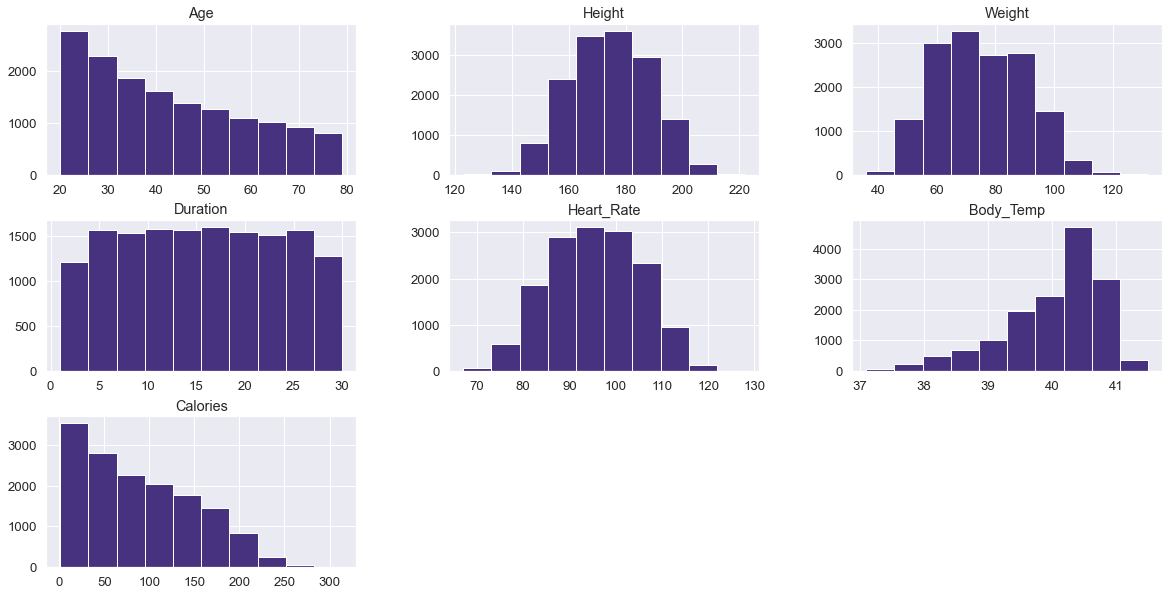

In [64]:
df_numeric = data[['Age', 'Height', 'Weight',  'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']]
df_numeric.hist(figsize=(20,10), sharex=False, sharey=False, layout=(3,3))
plt.show() 

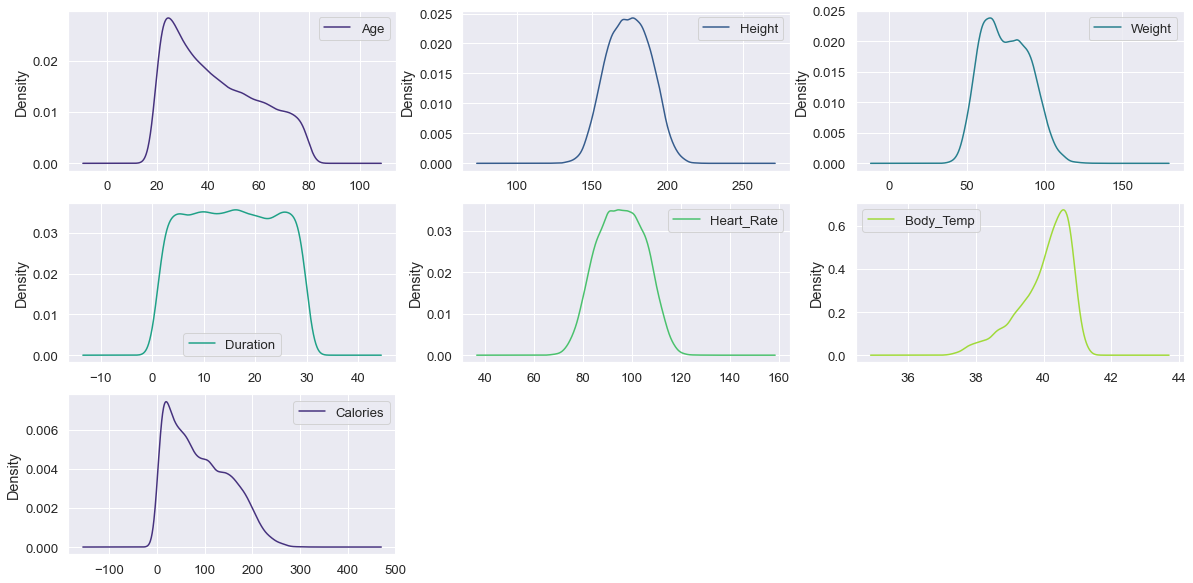

In [65]:
df_numeric = data[['Age', 'Height', 'Weight',  'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']]
df_numeric.plot(kind='density', subplots=True, sharex=False, figsize=(20,10), layout=(3,3))
plt.show() 

In [66]:
df_numeric.skew() 

Age           0.473383
Height       -0.006190
Weight        0.226725
Duration      0.004751
Heart_Rate   -0.010704
Body_Temp    -0.994382
Calories      0.505371
dtype: float64

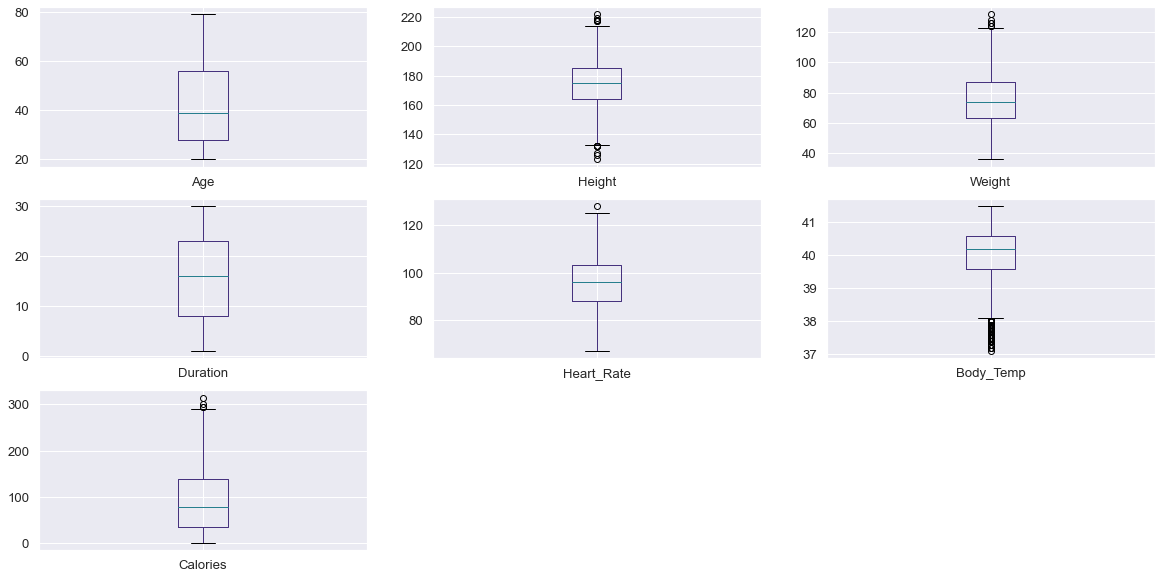

In [67]:
df_numeric.plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(3,3))
plt.show()

In [68]:
data.corr() 

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,1.000000,-0.003222,-0.710534,-0.783186,-0.003440,-0.011555,-0.007264,-0.022357
Age,-0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,-0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


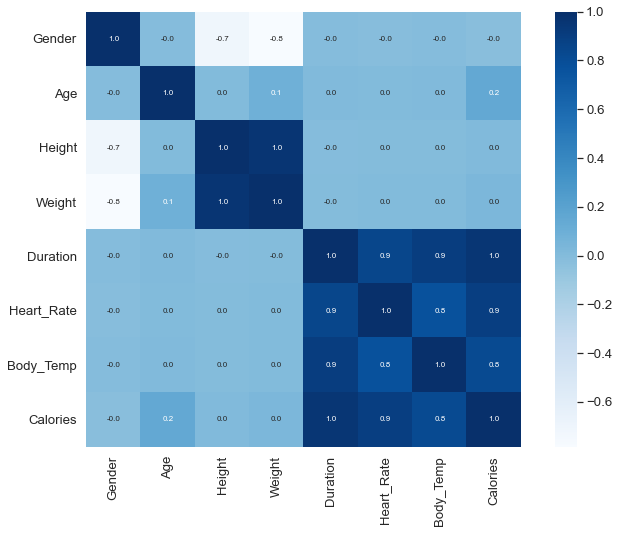

In [69]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show() 

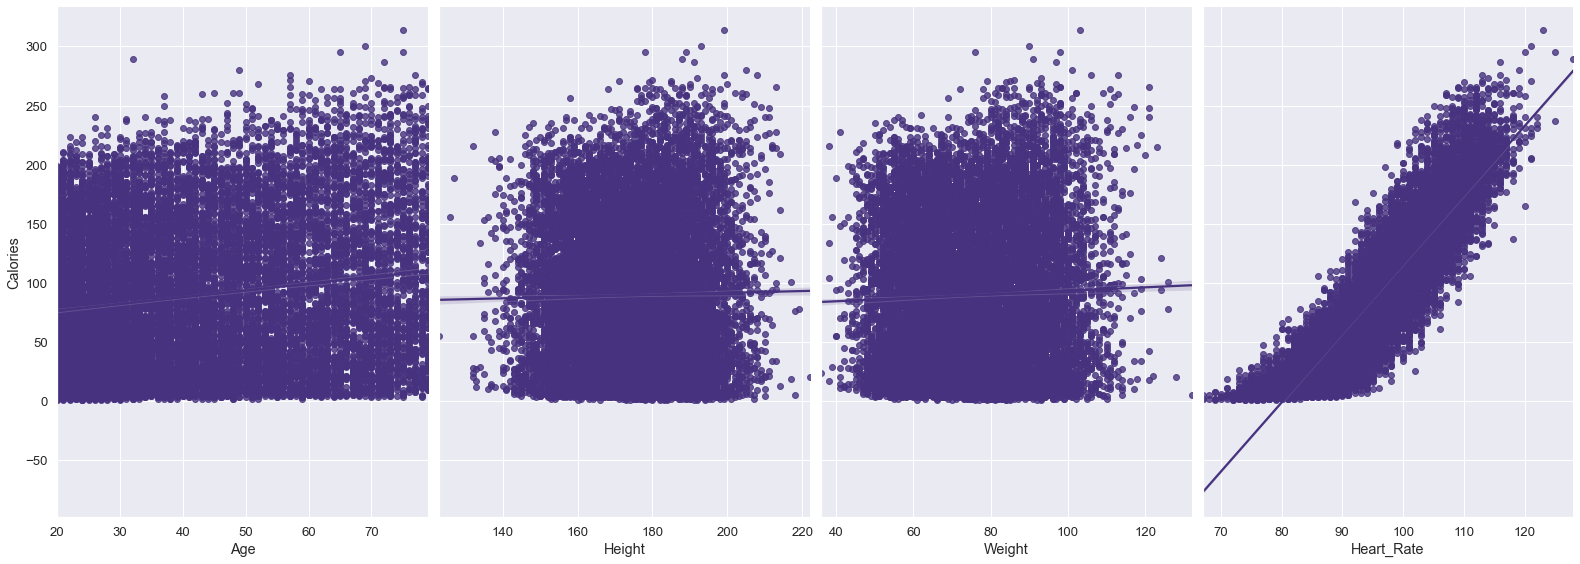

In [70]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['Age','Height','Weight', "Heart_Rate"],
             y_vars='Calories', height=8, aspect=0.7, kind='reg'); 

In [71]:
data.head() 

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [72]:
# create a list of feature names and response 
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [73]:
X 

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [74]:
y   

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [75]:
X.shape, y.shape

((15000, 7), (15000,))

## Splitting X and y into training and testing sets

![](../img/test_train.png)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=36)

In [78]:
X_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
5689,0,42,190.0,98.0,24.0,107.0,40.7
10913,1,34,157.0,60.0,24.0,100.0,40.7
9527,1,37,177.0,67.0,29.0,109.0,41.1
11849,1,23,166.0,66.0,17.0,93.0,40.2
2444,1,47,157.0,56.0,24.0,102.0,40.7
...,...,...,...,...,...,...,...
7329,0,54,164.0,67.0,18.0,93.0,40.8
2984,1,24,158.0,52.0,29.0,103.0,41.1
9118,0,68,190.0,89.0,4.0,86.0,38.8
610,1,66,151.0,57.0,21.0,100.0,40.7


In [79]:
X_test

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
10587,1,47,171.0,67.0,21.0,97.0,40.6
585,1,20,170.0,64.0,23.0,96.0,40.5
7439,1,46,166.0,59.0,23.0,100.0,40.8
9747,1,22,154.0,55.0,24.0,100.0,40.2
14471,1,58,149.0,55.0,5.0,85.0,39.1
...,...,...,...,...,...,...,...
8587,0,21,183.0,88.0,7.0,94.0,39.4
236,1,77,160.0,63.0,8.0,92.0,39.5
3984,0,53,196.0,103.0,9.0,91.0,39.8
10977,0,51,182.0,88.0,8.0,85.0,39.6


In [83]:
# default split is 75% for training and 25% for testing
print("X Dataset", X.shape)
print("Y Dataset", y.shape)
print("X_train", X_train.shape)
print("Y_train", y_train.shape)
print("X_test", X_test.shape)
print("Y_test", y_test.shape)

X Dataset (15000, 7)
Y Dataset (15000,)
X_train (11250, 7)
Y_train (11250,)
X_test (3750, 7)
Y_test (3750,)


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [85]:
# default split is 80%% for training and 20% for testing
print("X Dataset", X.shape)
print("Y Dataset", y.shape)
print("X_train", X_train.shape)
print("Y_train", y_train.shape)
print("X_test", X_test.shape)
print("Y_test", y_test.shape)

X Dataset (15000, 7)
Y Dataset (15000,)
X_train (12000, 7)
Y_train (12000,)
X_test (3000, 7)
Y_test (3000,)


In [86]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

In [87]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

466.69055402087145
[  1.19562034   0.49171313  -0.19951091   0.30893533   6.6529283
   1.96169136 -16.93716169]


In [88]:
# pair the feature names with the coefficients
list(zip(X, linreg.coef_))

[('Gender', 1.195620336300247),
 ('Age', 0.491713131947099),
 ('Height', -0.1995109095229794),
 ('Weight', 0.30893532667810525),
 ('Duration', 6.652928304194463),
 ('Heart_Rate', 1.9616913560859814),
 ('Body_Temp', -16.93716168784186)]

## Making predictions

In [90]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred

array([198.81182363,  80.43555305, 194.40940033, ...,  22.14745631,
       118.63504926, -11.98134672])

In [91]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print() 
print('Pred:', y_pred[0:25])

True: [198.  72. 195.  17.  74.  23.   5. 146. 259.   7.  92.  46.  45. 239.
 135.  65. 132.  52.  89. 110. 117.  60. 131. 191.   8.]

Pred: [198.81182363  80.43555305 194.40940033  17.39285622  78.9692843
  15.28475163  -0.3413037  146.15851941 209.87196487  -1.10270603
  93.96086448  60.06349105  51.56021441 200.92341992 150.5241029
  74.42816855 127.29159563  55.16658026 106.91150536 112.53779495
 116.28914176  63.04077309 131.25188823 178.22951826  11.41440434]


In [95]:
198 - 198.81

-0.8100000000000023

In [93]:
y_test.head() 

7576     198.0
10509     72.0
4253     195.0
5150      17.0
506       74.0
Name: Calories, dtype: float64

In [96]:
# calculate RMSE using scikit-learn
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

11.752620393538162


In [ ]:
print("R^2", metrics.r2_score(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MSE", metrics.mean_squared_error(y_test, y_pred))